In [11]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from utils import *

In [5]:
#Load the dataset where features w/ null vals have been dropped
ge_state_nn = pd.read_csv("datasets/ge_state_outcome_tamoxifen_v3.csv",
            index_col="patient_ID")
X_ge_st, y_ge_st = ge_state_nn.drop(["posOutcome"], axis=1), ge_state_nn["posOutcome"]
X_ge_st_train, X_ge_st_test, y_ge_st_train, y_ge_st_test = train_test_split(X_ge_st, y_ge_st, test_size=0.3, random_state=seed, stratify=y_ge_st)

In [7]:
state_cols_1 = ['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']

In [8]:
X_ge_train, X_ge_test = X_ge_st_train.drop(state_cols_1, axis=1), X_ge_st_test.drop(state_cols_1, axis=1)

In [12]:
from pymrmre import mrmr
solutions = mrmr.mrmr_ensemble(features=X_ge_train, targets=y_ge_st_train.to_frame(), solution_length=100, solution_count=1)
feats_100 = solutions[0][0]

In [13]:
params_nn_v1, clf_nn_v1, cv_scores_nn_v1, test_scores_nn_v1 = evaluate_ge((X_ge_st_train, X_ge_st_test, y_ge_st_train, y_ge_st_test), feats=feats_100, outcome_cols=state_cols_1, split=False)
print(params_nn_v1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:15:08] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.92 seconds.
Best Score: 85.674%
{'subsample': 0.6, 'scale_pos_weight': 0.7, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 5, 'max_delta_step': 5, 'learning_rate': 0.03, 'gamma': 2, 'colsample_bytree': 0.8}
[13:16:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.3s finished


In [15]:
params_nn_v2, clf_nn_v2, cv_scores_nn_v2, test_scores_nn_v2 = evaluate_ge((X_ge_train, X_ge_test, y_ge_st_train, y_ge_st_test), feats=feats_100,
                                    split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:18:57] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 11.88 seconds.
Best Score: 84.942%
{'subsample': 0.6, 'scale_pos_weight': 0.7, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8}
[13:19:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.6s finished


In [16]:
print_score_comparison(cv_scores_nn_v1, cv_scores_nn_v2, header_1="State + GE", header_2="GE Only")

	Validation set	posOutcome
			State + GE		GE Only
		-------------------------------------------------------
balanced_accuracy:	73.55%				72.14%

recall_0:		55.00%				52.50%

precision_0:		72.05%				69.98%

recall_1:		92.10%				91.79%

precision_1:		84.96%				84.22%

auc:			85.67%				84.94%



In [17]:

print_score_comparison(test_scores_nn_v1, test_scores_nn_v2, header_1="State + GE", header_2="GE Only", title="Test set")


	Test set	posOutcome
			State + GE		GE Only
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.74%

recall_0:		29.41%				33.33%

precision_0:		53.57%				54.84%

recall_1:		90.85%				90.14%

precision_1:		78.18%				79.01%

auc:			72.37%				71.35%



In [21]:
params_nn_v3, clf_nn_v3, cv_scores_nn_v3, test_scores_nn_v3 = evaluate_ge((X_ge_st_train, X_ge_st_test, y_ge_st_train, y_ge_st_test), feats=feats_100, outcome_cols=state_cols_1, rand_scoring=average_precision_0, split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:24:50] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:24:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.41 seconds.
Best Score: 24.499%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:25:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.6s finished


In [19]:
print_score_comparison(cv_scores_nn_v1, cv_scores_nn_v3, header_1="AUC Opt", header_2="AP_0 Opt")

	Validation set	posOutcome
			AUC Opt		AP_0 Opt
		-------------------------------------------------------
balanced_accuracy:	73.55%				68.22%

recall_0:		55.00%				87.50%

precision_0:		72.05%				38.66%

recall_1:		92.10%				48.95%

precision_1:		84.96%				91.57%

auc:			85.67%				80.63%



In [20]:
print_score_comparison(test_scores_nn_v1, test_scores_nn_v3,
    title="Test Set", header_1="AUC Opt", header_2="AP_0 Opt")

	Test Set	posOutcome
			AUC Opt		AP_0 Opt
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.40%

recall_0:		29.41%				78.43%

precision_0:		53.57%				33.61%

recall_1:		90.85%				44.37%

precision_1:		78.18%				85.14%

auc:			72.37%				72.88%



In [23]:
ge_state_nn_wo_pam = ge_state_nn.loc[:,~ge_state_nn.columns.str.startswith("pam")]
ge_state_nn_wo_pam

,ER,posOutcome,series_id_0,series_id_1,series_id_2,series_id_3,gpl_0,gpl_1,gpl_2,radiotherapyClass_0,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,1,0,0,0,0,1,0,1,0,0,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,1,0,0,0,1,0,1,0,0,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,1,0,0,0,0,1,0,1,0,0,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,1,0,0,0,0,1,0,1,0,0,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1,0,0,0,1,0,1,0,0,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,1,1,0,0,0,0,0,1,1,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,1,1,0,0,0,0,0,1,1,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,1,1,0,0,0,0,0,1,1,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [24]:
state_cols_2 = ['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']
params_nn_no_pam, clf_nn_no_pam, cv_scores_no_pam, test_scores_no_pam = evaluate_ge(ge_state_nn_wo_pam, feats=feats_100, outcome_cols=state_cols_2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:27:03] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:27:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.12 seconds.
Best Score: 84.957%
{'subsample': 0.8, 'scale_pos_weight': 0.3, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 1.0}
[13:27:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.5s finished


In [25]:
print_score_comparison(cv_scores_nn_v1, cv_scores_no_pam,
    header_1="With Pam", header_2="No PAM")

	Validation set	posOutcome
			With Pam		No PAM
		-------------------------------------------------------
balanced_accuracy:	73.55%				75.51%

recall_0:		55.00%				65.00%

precision_0:		72.05%				63.26%

recall_1:		92.10%				86.02%

precision_1:		84.96%				87.14%

auc:			85.67%				84.96%



In [26]:
print_score_comparison(test_scores_nn_v1, test_scores_no_pam,
    header_1="With Pam", header_2="No PAM", title="Test set")

	Test set	posOutcome
			With Pam		No PAM
		-------------------------------------------------------
balanced_accuracy:	60.13%				63.27%

recall_0:		29.41%				39.22%

precision_0:		53.57%				52.63%

recall_1:		90.85%				87.32%

precision_1:		78.18%				80.00%

auc:			72.37%				74.04%



In [27]:
ge_state_nn_wo_p5 = ge_state_nn.loc[:,~ge_state_nn.columns.str.startswith("p5")]
ge_state_nn_wo_p5

,ER,posOutcome,series_id_0,series_id_1,series_id_2,series_id_3,gpl_0,gpl_1,gpl_2,pam_coincide_0,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,1,0,0,0,0,1,0,1,0,0,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,1,0,0,0,1,0,1,0,0,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,1,0,0,0,0,1,0,1,0,0,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,1,0,0,0,0,1,0,1,0,0,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1,0,0,0,1,0,1,0,0,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,1,1,0,0,0,0,0,1,0,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [28]:
state_cols_3 = ['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1']
params_nn_no_p5, clf_nn_no_p5, cv_scores_no_p5, test_scores_no_p5 = evaluate_ge(ge_state_nn_wo_p5, feats=feats_100, outcome_cols=state_cols_3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:29:29] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:29:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.81 seconds.
Best Score: 85.389%
{'subsample': 0.8, 'scale_pos_weight': 0.7, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 5, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8}
[13:30:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.4s finished


In [30]:
print_score_comparison(cv_scores_nn_v1, cv_scores_no_p5,
    header_1="With p5", header_2="No p5")

	Validation set	posOutcome
			With p5		No p5
		-------------------------------------------------------
balanced_accuracy:	69.19%				66.62%

recall_0:		47.50%				40.83%

precision_0:		66.00%				67.54%

recall_1:		90.88%				92.41%

precision_1:		82.74%				81.15%

auc:			79.31%				80.07%



In [29]:
print_score_comparison(test_scores_nn_v1, test_scores_no_p5,
    header_1="With p5", header_2="No p5", title="Test set")

	Test set	posOutcome
			With p5		No p5
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.11%

recall_0:		29.41%				31.37%

precision_0:		53.57%				55.17%

recall_1:		90.85%				90.85%

precision_1:		78.18%				78.66%

auc:			72.37%				72.63%



In [30]:
print_score_comparison(test_scores_no_pam, test_scores_no_p5, header_1="No PAM", header_2="NO P5", title="Test set")

	Test set	posOutcome
			No PAM		NO P5
		-------------------------------------------------------
balanced_accuracy:	63.27%				61.11%

recall_0:		39.22%				31.37%

precision_0:		52.63%				55.17%

recall_1:		87.32%				90.85%

precision_1:		80.00%				78.66%

auc:			74.04%				72.63%



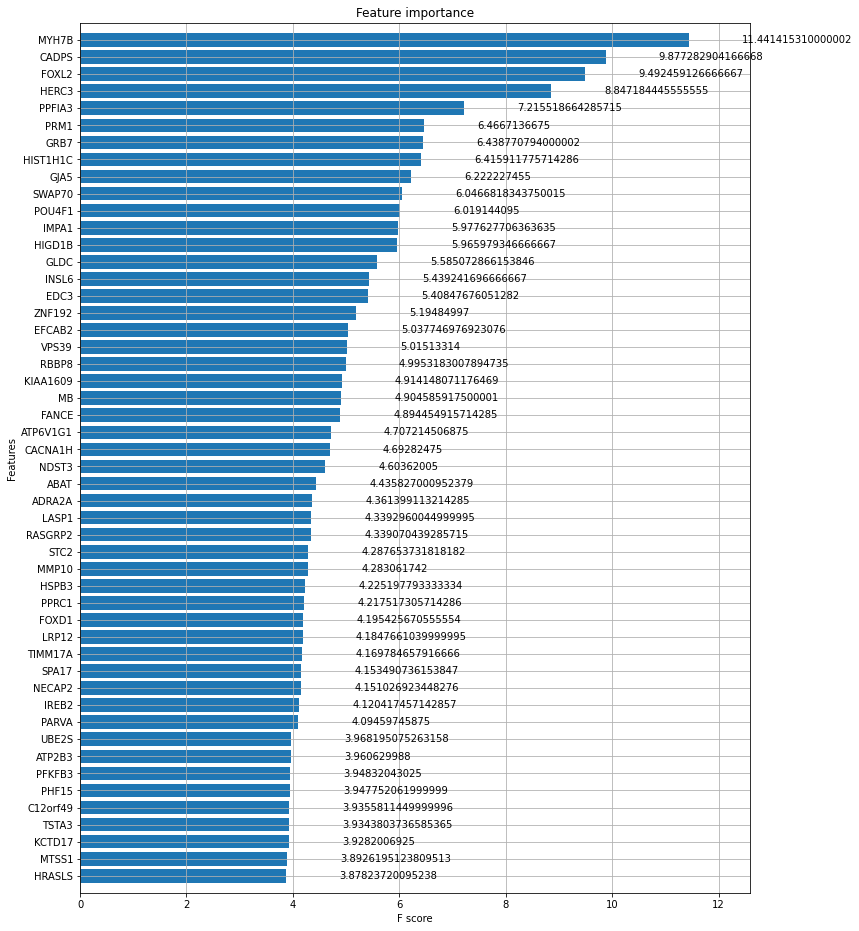

In [31]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 16))
plot_importance(clf_nn_v1, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()

In [32]:
params_nn_st, clf_nn_st, cv_nn_scores_st, test_nn_scores_st = evaluate_ge(ge_state_nn, outcome_cols=state_cols_1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:31:40] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:31:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.95 seconds.
Best Score: 67.391%
{'subsample': 1.0, 'scale_pos_weight': 0.5, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 1, 'colsample_bytree': 0.8}
[13:33:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.6s finished


In [33]:
print_score_comparison(cv_scores_nn_v1, cv_nn_scores_st,
    header_1="GE +  State", header_2="State Only")

	Validation set	posOutcome
			GE +  State		State Only
		-------------------------------------------------------
balanced_accuracy:	73.55%				62.33%

recall_0:		55.00%				41.67%

precision_0:		72.05%				47.06%

recall_1:		92.10%				83.00%

precision_1:		84.96%				79.79%

auc:			85.67%				67.39%



In [34]:
print_score_comparison(test_scores_nn_v1, test_nn_scores_st,
   header_1="GE +  State", header_2="State Only", title="Test set")

	Test set	posOutcome
			GE +  State		State Only
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.79%

recall_0:		29.41%				41.18%

precision_0:		53.57%				45.65%

recall_1:		90.85%				82.39%

precision_1:		78.18%				79.59%

auc:			72.37%				67.17%



In [35]:
print_score_comparison(cv_scores_nn_v2, cv_nn_scores_st,
    header_1="GE Only", header_2="State Only")

	Validation set	posOutcome
			GE Only		State Only
		-------------------------------------------------------
balanced_accuracy:	72.14%				62.33%

recall_0:		52.50%				41.67%

precision_0:		69.98%				47.06%

recall_1:		91.79%				83.00%

precision_1:		84.22%				79.79%

auc:			84.94%				67.39%



In [37]:
print_score_comparison(test_scores_nn_v2, test_nn_scores_st,
    header_1="GE Only", header_2="State Only")

	Validation set	posOutcome
			GE Only		State Only
		-------------------------------------------------------
balanced_accuracy:	61.74%				61.79%

recall_0:		33.33%				41.18%

precision_0:		54.84%				45.65%

recall_1:		90.14%				82.39%

precision_1:		79.01%				79.59%

auc:			71.35%				67.17%

